In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import jieba
import re 
import os
import codecs
from wordcloud import WordCloud
import datetime
import seaborn as sns

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import matplotlib
print(matplotlib.matplotlib_fname())

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc


In [4]:
df = pd.read_csv('查新闻-煤炭.csv')

In [5]:
df = df.reindex(columns=['full_name', 'risk_name','data_sentiment','newsDate','snap_shot','data_url'])

In [6]:
#只提取 year&month
datestr = []
for i in range(18236):
    ds = datetime.datetime.strptime(df['newsDate'][i], '%Y-%m-%d').strftime("%Y")
    datestr.append(ds)
df['年份'] = datestr

In [7]:
#counts 
count = df['年份'].size
ones = np.ones(count, dtype=int)
df['次数'] = ones
rq = df.groupby('年份').count()

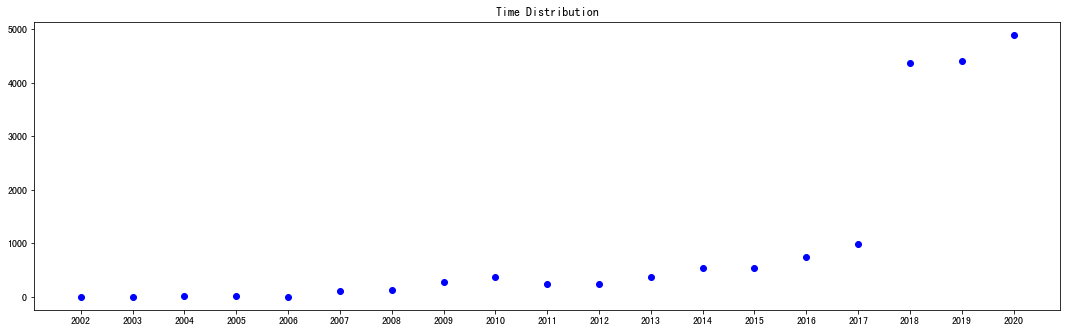

In [8]:
# plot the time distribution
x = rq.index
y = rq['次数']
fig = plt.figure()
ax = fig.add_subplot(111)
fig.subplots_adjust(top=1, bottom =0,  hspace=2, right=2.5)
plt.title('Time Distribution')
ax.plot_date(x, y, ydate=False, xdate=True, color='blue')

In [9]:
company = df['full_name'].drop_duplicates().values
columns = ['有风险','无风险']
df2 = pd.DataFrame(index=company, columns=columns)
for i in range(len(company)):
    df1 = df.loc[df['full_name'].values==company[i]]
    c = df1['data_sentiment'].value_counts()
    if c.count() == 1:
        df2['无风险'][i] =0 
        df2['有风险'][i] = c[0]
    else:
        df2['有风险'][i] = c[0]
        df2['无风险'][i] = c[1]
       
df2

,有风险,无风险
上海大屯能源股份有限公司,258,66
中国中煤能源股份有限公司,420,403
中国神华能源股份有限公司,896,559
中煤新集能源股份有限公司,438,165
兖州煤业股份有限公司,1714,747
冀中能源股份有限公司,647,464
内蒙古伊泰煤炭股份有限公司,322,195
内蒙古平庄能源股份有限公司,578,195
内蒙古霍林河露天煤业股份有限公司,428,341
北京昊华能源股份有限公司,768,190


In [10]:
risk = df['risk_name'].drop_duplicates().values

df3 = pd.DataFrame(index=company, columns=risk)# building the dataframe
for i in range(len(risk)):
    for j in range(len(company)):
        d1 = df.loc[df['risk_name'].values==risk[i]] # looping the risk name 
        d2 = d1.loc[d1['full_name'].values == company[j]] # looping the company name
        if d2.empty:
            df3[risk[i]][j]= 0 
        else:
            m = d2['full_name'].count()
            df3[risk[i]][j]= m

In [11]:
df3

,股份解禁,市场预警,责令整改,监管预警,风险澄清,交易异常波动,高管层重大变动,管理预警,出售经营性资产,经营预警,...,投资失利,被公开谴责,司法冻结,司法查封冻结,被出具监管函,债务展期,通报批评,资产冻结,非标准审计报告,带强调事项的标准审计报告
上海大屯能源股份有限公司,2,7,2,6,1,1,27,28,7,52,...,0,0,0,0,0,0,0,0,0,0
中国中煤能源股份有限公司,4,25,2,14,1,0,35,49,6,55,...,0,0,0,0,0,0,0,0,0,0
中国神华能源股份有限公司,3,77,2,24,2,3,64,89,8,165,...,0,0,0,0,0,0,0,0,0,0
中煤新集能源股份有限公司,0,18,0,21,1,0,8,10,4,99,...,0,0,0,0,0,0,0,0,0,0
兖州煤业股份有限公司,1,77,8,42,9,1,27,31,16,621,...,0,0,0,0,0,0,0,0,0,0
冀中能源股份有限公司,3,59,0,17,3,1,20,25,7,138,...,0,0,0,0,0,0,0,0,0,0
内蒙古伊泰煤炭股份有限公司,0,12,2,5,1,0,25,34,2,33,...,0,0,0,0,0,0,0,0,0,0
内蒙古平庄能源股份有限公司,1,18,3,10,6,0,32,35,1,142,...,0,0,0,0,0,0,0,0,0,0
内蒙古霍林河露天煤业股份有限公司,10,57,8,40,5,3,48,55,8,44,...,0,0,0,0,0,0,0,0,0,0
北京昊华能源股份有限公司,3,41,1,72,0,1,13,14,12,122,...,0,0,0,0,0,0,0,0,0,0


In [12]:
datestr1 = []
for i in range(18236):
    ds = datetime.datetime.strptime(df['newsDate'][i], '%Y-%m-%d').strftime("%Y%m")
    datestr1.append(ds)
df['年月'] = datestr1

# redo the process
df5 = df.reindex(columns=['risk_name','年月']).dropna()
yearmonth = df['年月'].drop_duplicates().values

df6 = pd.DataFrame(index=yearmonth, columns=risk)
for i in range(len(risk)):
    for j in range(len(yearmonth)):
        d1 = df5.loc[df5['risk_name'].values==risk[i]]
        d2 = d1.loc[d1['年月'].values == yearmonth[j]]
        if d2.empty:
            df6[risk[i]][j]= 0
        else:
            m = d2['年月'].count()
            df6[risk[i]][j]= m
df6

,股份解禁,市场预警,责令整改,监管预警,风险澄清,交易异常波动,高管层重大变动,管理预警,出售经营性资产,经营预警,...,投资失利,被公开谴责,司法冻结,司法查封冻结,被出具监管函,债务展期,通报批评,资产冻结,非标准审计报告,带强调事项的标准审计报告
200701,1,2,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
200707,2,2,7,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
200709,0,3,2,2,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
200710,0,1,8,8,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
200904,0,1,0,1,1,0,4,4,2,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200611,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
200505,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
200901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
200504,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
df6.to_excel('每月各风险触发次数.xlsx')

In [13]:
df4 = df.reindex(columns=['snap_shot'])
txt2 = ""
for i in range(18236):
    text = df4[i:i+1].values
    line = np.array_str(text).split(",", 1)
    line = line[0].translate({ord(i): None for i in '；【】abcdefghijklmnopqrstuvwxyz1234567890ABCDEFGHIJKLMNOPQRSTUVWXYZ\n\“/！]……:''”[;__".<>'',-*。：，_?__;+、=（）()《》‘{}？‘%'' '})
    line = line.replace("'", "")
    df4[i:i+1] = line
    txt2 = txt2 + line
df4

,snap_shot
0,上海能源有限售条件的流通股上市公告
1,上海能源有限售条件的流通股上市公告
2,上海能源关于加强公司治理的自查报告和整改计划
3,上海能源关于加强公司治理的自查报告和整改计划
4,上海能源澄清公告
...,...
18231,瑞茂通陕西煤业股份有限公司年半年度财务报表
18232,瑞茂通瑞茂通关于公司拟为陕西煤业股份有限公司提供反担保的公告
18233,瑞茂通瑞茂通关于公司拟为陕西煤业股份有限公司提供反担保的公告
18234,陕西煤业公布三季报前三季净利增加


In [14]:
utxt2 = txt2.encode()
words = jieba.lcut(utxt2)    
counts = {}     
for word in words:
    if len(word) == 1:    
        continue
    else:
        counts[word] = counts.get(word, 0) + 1    
items2 = list(counts.items())
items2.sort(key=lambda x: x[1], reverse=True)    
items2[0:1000]

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/_7/2nw00fds2m71jnw9xlpl6js40000gn/T/jieba.cache
Loading model cost 1.577 seconds.
Prefix dict has been built successfully.


[('股份', 6102),
 ('能源', 5775),
 ('有限公司', 5235),
 ('公告', 4580),
 ('年月日', 3036),
 ('煤业', 3027),
 ('收到', 2980),
 ('公司', 2874),
 ('法院', 2829),
 ('判决书', 2814),
 ('关于', 2786),
 ('兖州煤业', 2272),
 ('煤电', 1795),
 ('年度', 1531),
 ('中国', 1489),
 ('煤炭', 1330),
 ('神华', 1200),
 ('亿元', 1189),
 ('股东', 1103),
 ('互动', 1088),
 ('冀中', 1055),
 ('答问', 1015),
 ('发行', 952),
 ('同比', 937),
 ('昊华', 836),
 ('第一期', 810),
 ('子公司', 774),
 ('评级', 755),
 ('控股', 750),
 ('集团', 737),
 ('净利', 731),
 ('露天', 715),
 ('报告', 708),
 ('公司债券', 677),
 ('董事', 645),
 ('业绩', 619),
 ('提供', 616),
 ('净利润', 601),
 ('阳泉', 596),
 ('辞职', 588),
 ('新集', 588),
 ('短期', 577),
 ('融资券', 565),
 ('西山', 563),
 ('大有', 562),
 ('下降', 544),
 ('内蒙古', 538),
 ('平庄', 529),
 ('红阳', 529),
 ('担保', 525),
 ('上半年', 510),
 ('公开', 489),
 ('潞安', 486),
 ('郑州', 482),
 ('兰花', 467),
 ('三季度', 466),
 ('平煤', 466),
 ('山西', 462),
 ('北京', 462),
 ('陕西', 457),
 ('盘江', 452),
 ('董事会', 447),
 ('资产', 447),
 ('独立', 442),
 ('会议', 440),
 ('安源', 436),
 ('股权', 426),
 ('中期', 422),
 ('伊泰', 39

In [45]:
wordcount = pd.DataFrame(items2,columns=['词名','出现次数'])
wordcount.to_excel('新闻标题出现次数前1000.xlsx')

In [15]:
citydic = pd.read_excel('城市字典.xlsx')
citydic 

,词名,出现次数
0,冀中,1055
1,阳泉,596
2,新集,588
3,西山,563
4,内蒙古,538
5,平庄,529
6,潞安,486
7,郑州,482
8,山西,462
9,北京,462


In [16]:
riskdic = ['市场预警','责令整改','监管预警','风险澄清',	'交易异常波动','高管层重大变动',
           '管理预警','出售经营性资产','经营预警','停复牌预警','对外担保风险','担保预警',
           '盈利能力下降或亏损','财务预警','借贷事项','被关注或问询','信用预警','法律诉讼']

In [17]:
df = df.loc[(df['年份'] > '2013')]


In [19]:
company
citylist = citydic['词名'].values

In [18]:

newdf = pd.DataFrame(index=citylist, columns=riskdic)

for i in range(len(citylist)):
    for j in range(len(riskdic)):
        city = df[df["snap_shot"].str.contains(citylist[i], na=False)]
        city_risk = city.loc[(city['risk_name'] == riskdic[j])]
        count = city_risk.loc[city_risk['年份'] == '2014','次数'].count()
        newdf[riskdic[j]][i]= count
newdf.to_excel('2014年地区-风险.xlsx')

NameError: name 'citylist' is not defined

In [109]:
newdf = pd.DataFrame(index=citylist, columns=riskdic)
citylist = citydic['词名'].values
for i in range(len(citylist)):
    for j in range(len(riskdic)):
        city = df[df["snap_shot"].str.contains(citylist[i], na=False)]
        city_risk = city.loc[(city['risk_name'] == riskdic[j])]
        count = city_risk.loc[city_risk['年份'] == '2015','次数'].count()
        newdf[riskdic[j]][i]= count
newdf.to_excel('2015年地区-风险.xlsx')

In [110]:
newdf = pd.DataFrame(index=citylist, columns=riskdic)
citylist = citydic['词名'].values
for i in range(len(citylist)):
    for j in range(len(riskdic)):
        city = df[df["snap_shot"].str.contains(citylist[i], na=False)]
        city_risk = city.loc[(city['risk_name'] == riskdic[j])]
        count = city_risk.loc[city_risk['年份'] == '2016','次数'].count()
        newdf[riskdic[j]][i]= count
newdf.to_excel('2016年地区-风险.xlsx')


In [111]:
newdf = pd.DataFrame(index=citylist, columns=riskdic)
citylist = citydic['词名'].values
for i in range(len(citylist)):
    for j in range(len(riskdic)):
        city = df[df["snap_shot"].str.contains(citylist[i], na=False)]
        city_risk = city.loc[(city['risk_name'] == riskdic[j])]
        count = city_risk.loc[city_risk['年份'] == '2017','次数'].count()
        newdf[riskdic[j]][i]= count
newdf.to_excel('2017年地区-风险.xlsx')

In [112]:
newdf = pd.DataFrame(index=citylist, columns=riskdic)
citylist = citydic['词名'].values
for i in range(len(citylist)):
    for j in range(len(riskdic)):
        city = df[df["snap_shot"].str.contains(citylist[i], na=False)]
        city_risk = city.loc[(city['risk_name'] == riskdic[j])]
        count = city_risk.loc[city_risk['年份'] == '2018','次数'].count()
        newdf[riskdic[j]][i]= count
newdf.to_excel('2018年地区-风险.xlsx')

In [113]:
newdf = pd.DataFrame(index=citylist, columns=riskdic)
citylist = citydic['词名'].values
for i in range(len(citylist)):
    for j in range(len(riskdic)):
        city = df[df["snap_shot"].str.contains(citylist[i], na=False)]
        city_risk = city.loc[(city['risk_name'] == riskdic[j])]
        count = city_risk.loc[city_risk['年份'] == '2019','次数'].count()
        newdf[riskdic[j]][i]= count
newdf.to_excel('2019年地区-风险.xlsx')

In [114]:
newdf = pd.DataFrame(index=citylist, columns=riskdic)
citylist = citydic['词名'].values
for i in range(len(citylist)):
    for j in range(len(riskdic)):
        city = df[df["snap_shot"].str.contains(citylist[i], na=False)]
        city_risk = city.loc[(city['risk_name'] == riskdic[j])]
        count = city_risk.loc[city_risk['年份'] == '2020','次数'].count()
        newdf[riskdic[j]][i]= count
newdf.to_excel('2020年地区-风险.xlsx')

In [117]:
newdf1 = pd.DataFrame()

,市场预警,责令整改,监管预警,风险澄清,交易异常波动,高管层重大变动,管理预警,出售经营性资产,经营预警,停复牌预警,对外担保风险,担保预警,盈利能力下降或亏损,财务预警,借贷事项,被关注或问询,信用预警,法律诉讼


In [21]:
cityl = []
riskl = []
countl = []
newdf2 = pd.DataFrame()
for i in range(len(citylist)):
    for j in range(len(riskdic)):
        city = df[df["snap_shot"].str.contains(citylist[i], na=False)]
        city_risk = city.loc[(city['risk_name'] == riskdic[j])]
        count = city_risk.loc[city_risk['年份'] == '2014','次数'].count()
        cityl.append(citylist[i])
        riskl.append(riskdic[j])
        countl.append(count)
newdf2['风险名称'] = riskl 
newdf2['地区'] = cityl
newdf2['触发次数'] = countl
newdf2

,风险名称,地区,触发次数
0,市场预警,冀中,1
1,责令整改,冀中,0
2,监管预警,冀中,0
3,风险澄清,冀中,0
4,交易异常波动,冀中,0
...,...,...,...
373,财务预警,山东,0
374,借贷事项,山东,0
375,被关注或问询,山东,0
376,信用预警,山东,0


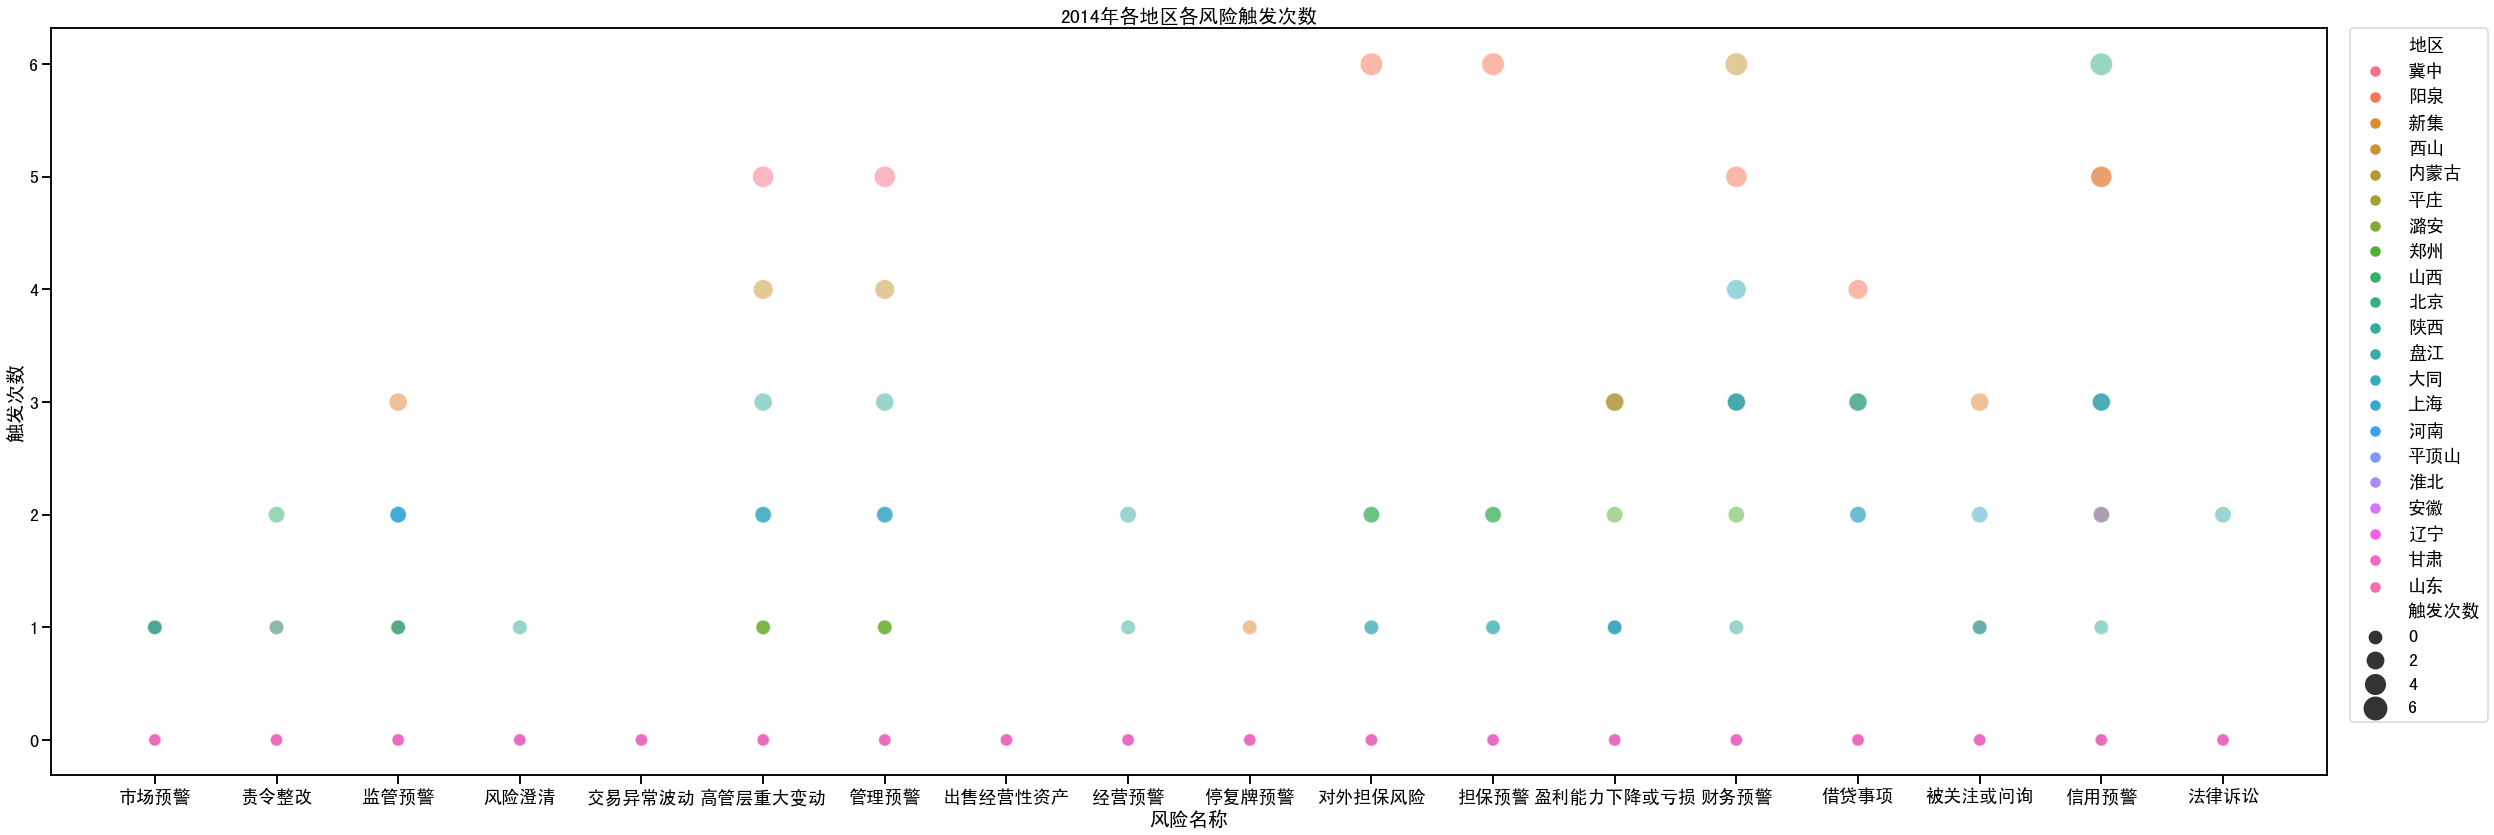

In [26]:
sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(35,12))
sns.scatterplot(x="风险名称", 
                y="触发次数",
                size="触发次数",
                sizes=(150,500),
                alpha=0.5,
                hue="地区",
                data=newdf2)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
# Put the legend out of the figure
#plt.legend(bbox_to_anchor=(1.01, 0.54),  borderaxespad=0.)
plt.xlabel("风险名称")
plt.ylabel("触发次数")
plt.title("2014年各地区各风险触发次数")
plt.tight_layout()

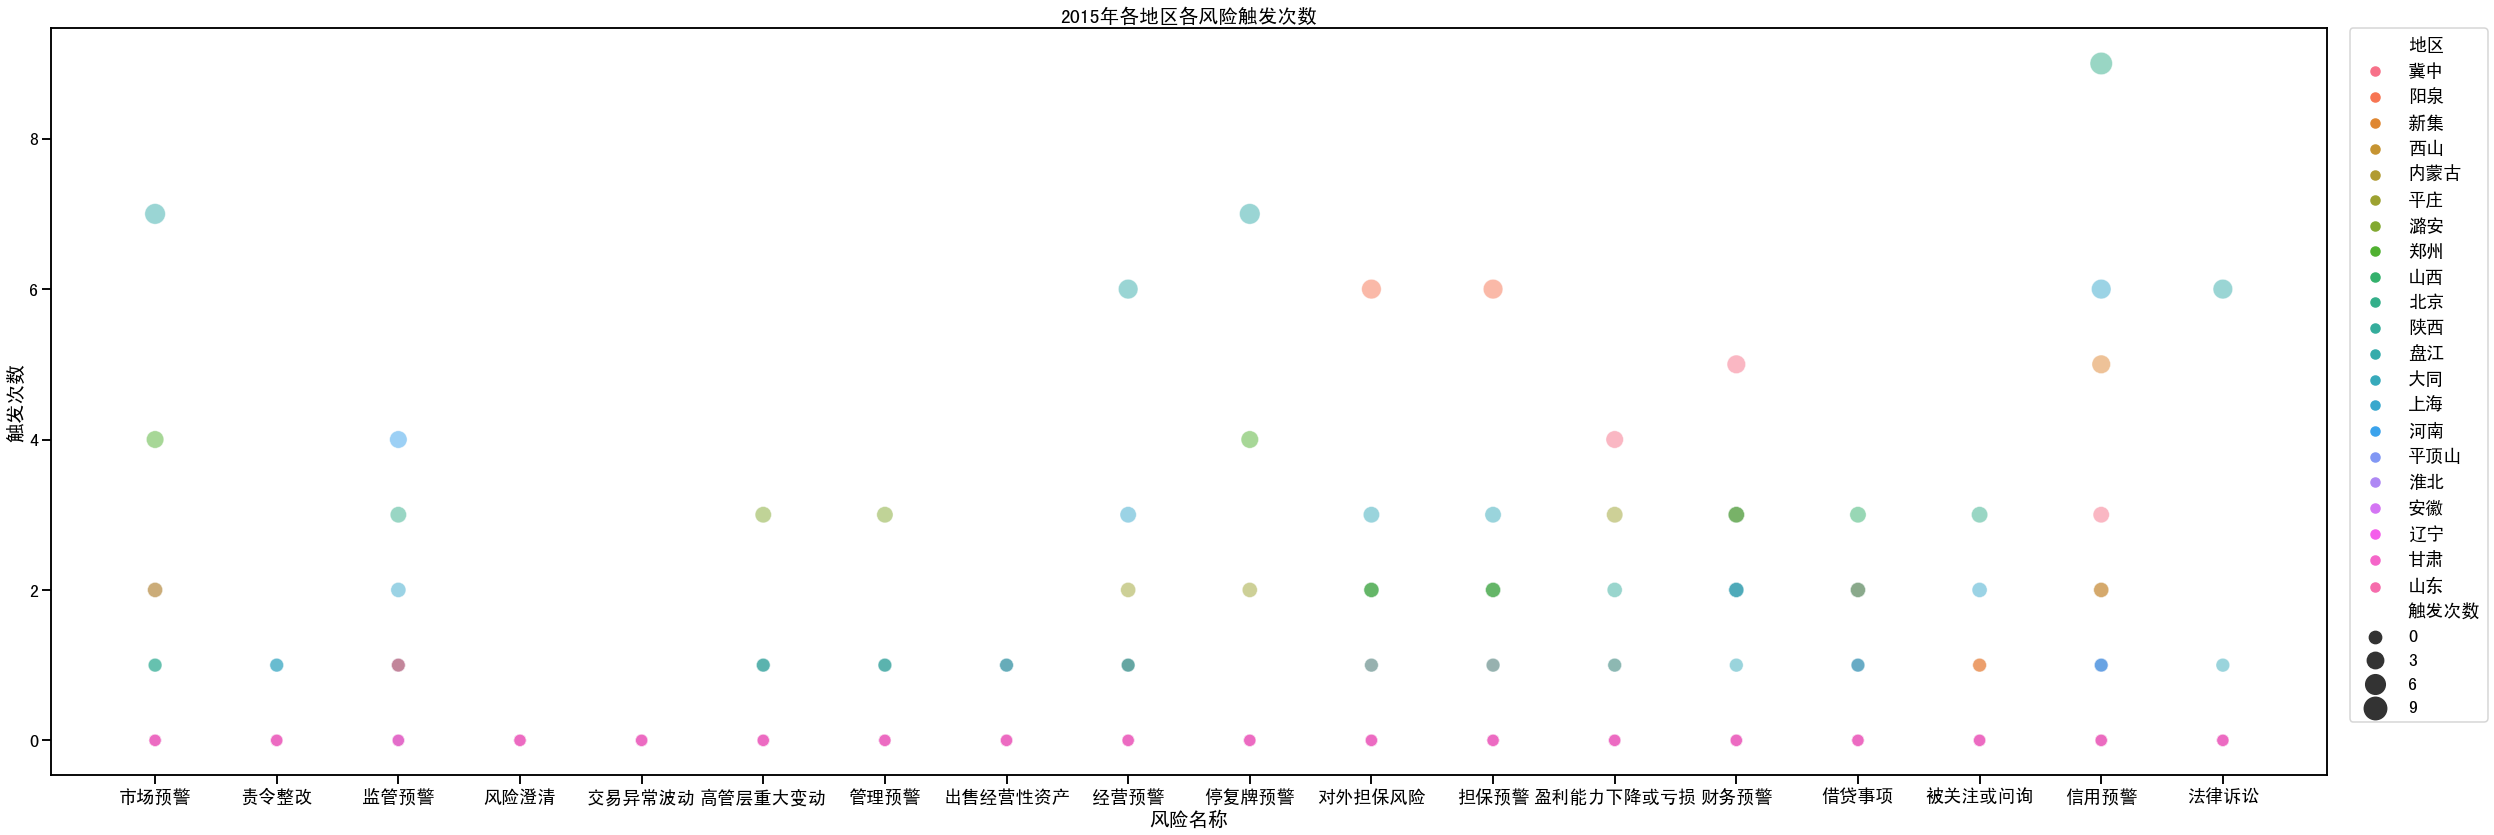

In [27]:
cityl = []
riskl = []
countl = []
newdf2 = pd.DataFrame()
for i in range(len(citylist)):
    for j in range(len(riskdic)):
        city = df[df["snap_shot"].str.contains(citylist[i], na=False)]
        city_risk = city.loc[(city['risk_name'] == riskdic[j])]
        count = city_risk.loc[city_risk['年份'] == '2015','次数'].count()
        cityl.append(citylist[i])
        riskl.append(riskdic[j])
        countl.append(count)
newdf2['风险名称'] = riskl 
newdf2['地区'] = cityl
newdf2['触发次数'] = countl
sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(35,12))
sns.scatterplot(x="风险名称", 
                y="触发次数",
                size="触发次数",
                sizes=(150,500),
                alpha=0.5,
                hue="地区",
                data=newdf2)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
# Put the legend out of the figure
#plt.legend(bbox_to_anchor=(1.01, 0.54),  borderaxespad=0.)
plt.xlabel("风险名称")
plt.ylabel("触发次数")
plt.title("2015年各地区各风险触发次数")
plt.tight_layout()

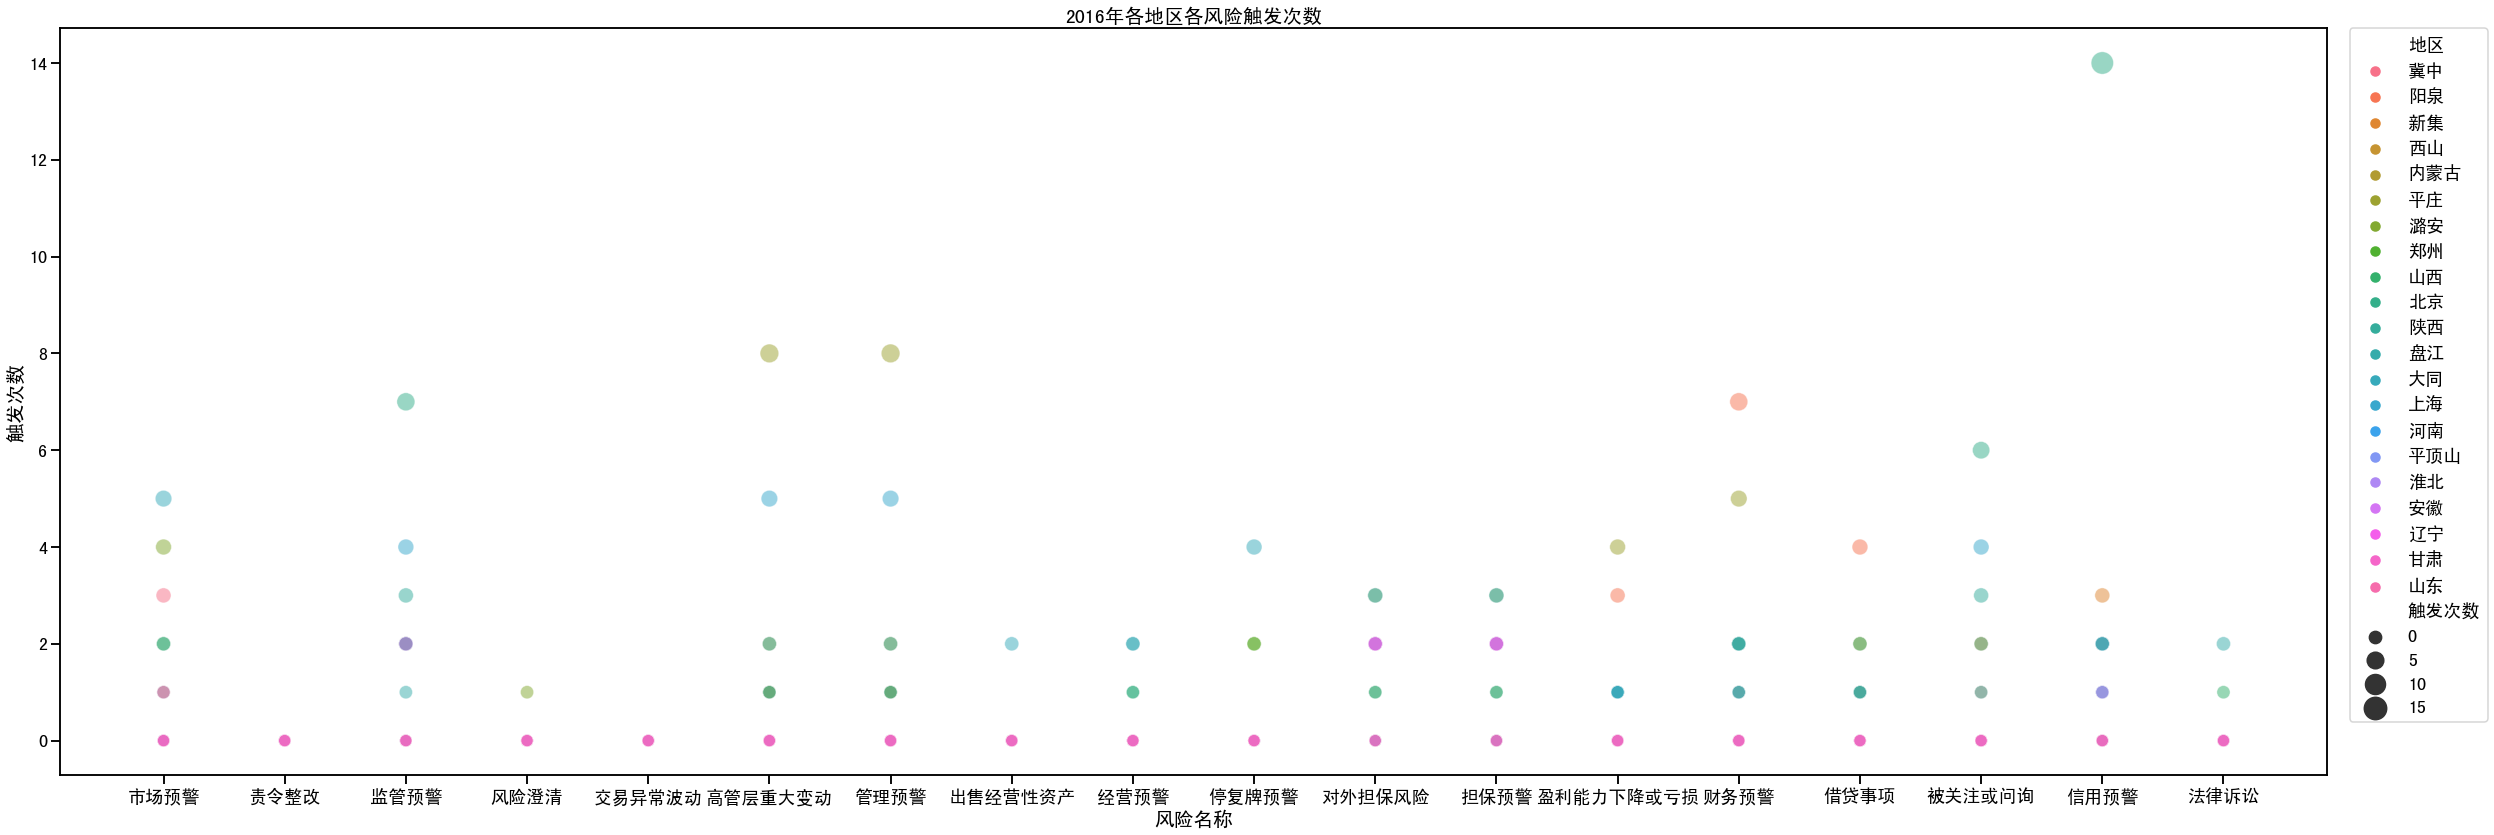

In [28]:
cityl = []
riskl = []
countl = []
newdf2 = pd.DataFrame()
for i in range(len(citylist)):
    for j in range(len(riskdic)):
        city = df[df["snap_shot"].str.contains(citylist[i], na=False)]
        city_risk = city.loc[(city['risk_name'] == riskdic[j])]
        count = city_risk.loc[city_risk['年份'] == '2016','次数'].count()
        cityl.append(citylist[i])
        riskl.append(riskdic[j])
        countl.append(count)
newdf2['风险名称'] = riskl 
newdf2['地区'] = cityl
newdf2['触发次数'] = countl
sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(35,12))
sns.scatterplot(x="风险名称", 
                y="触发次数",
                size="触发次数",
                sizes=(150,500),
                alpha=0.5,
                hue="地区",
                data=newdf2)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
# Put the legend out of the figure
#plt.legend(bbox_to_anchor=(1.01, 0.54),  borderaxespad=0.)
plt.xlabel("风险名称")
plt.ylabel("触发次数")
plt.title("2016年各地区各风险触发次数")
plt.tight_layout()

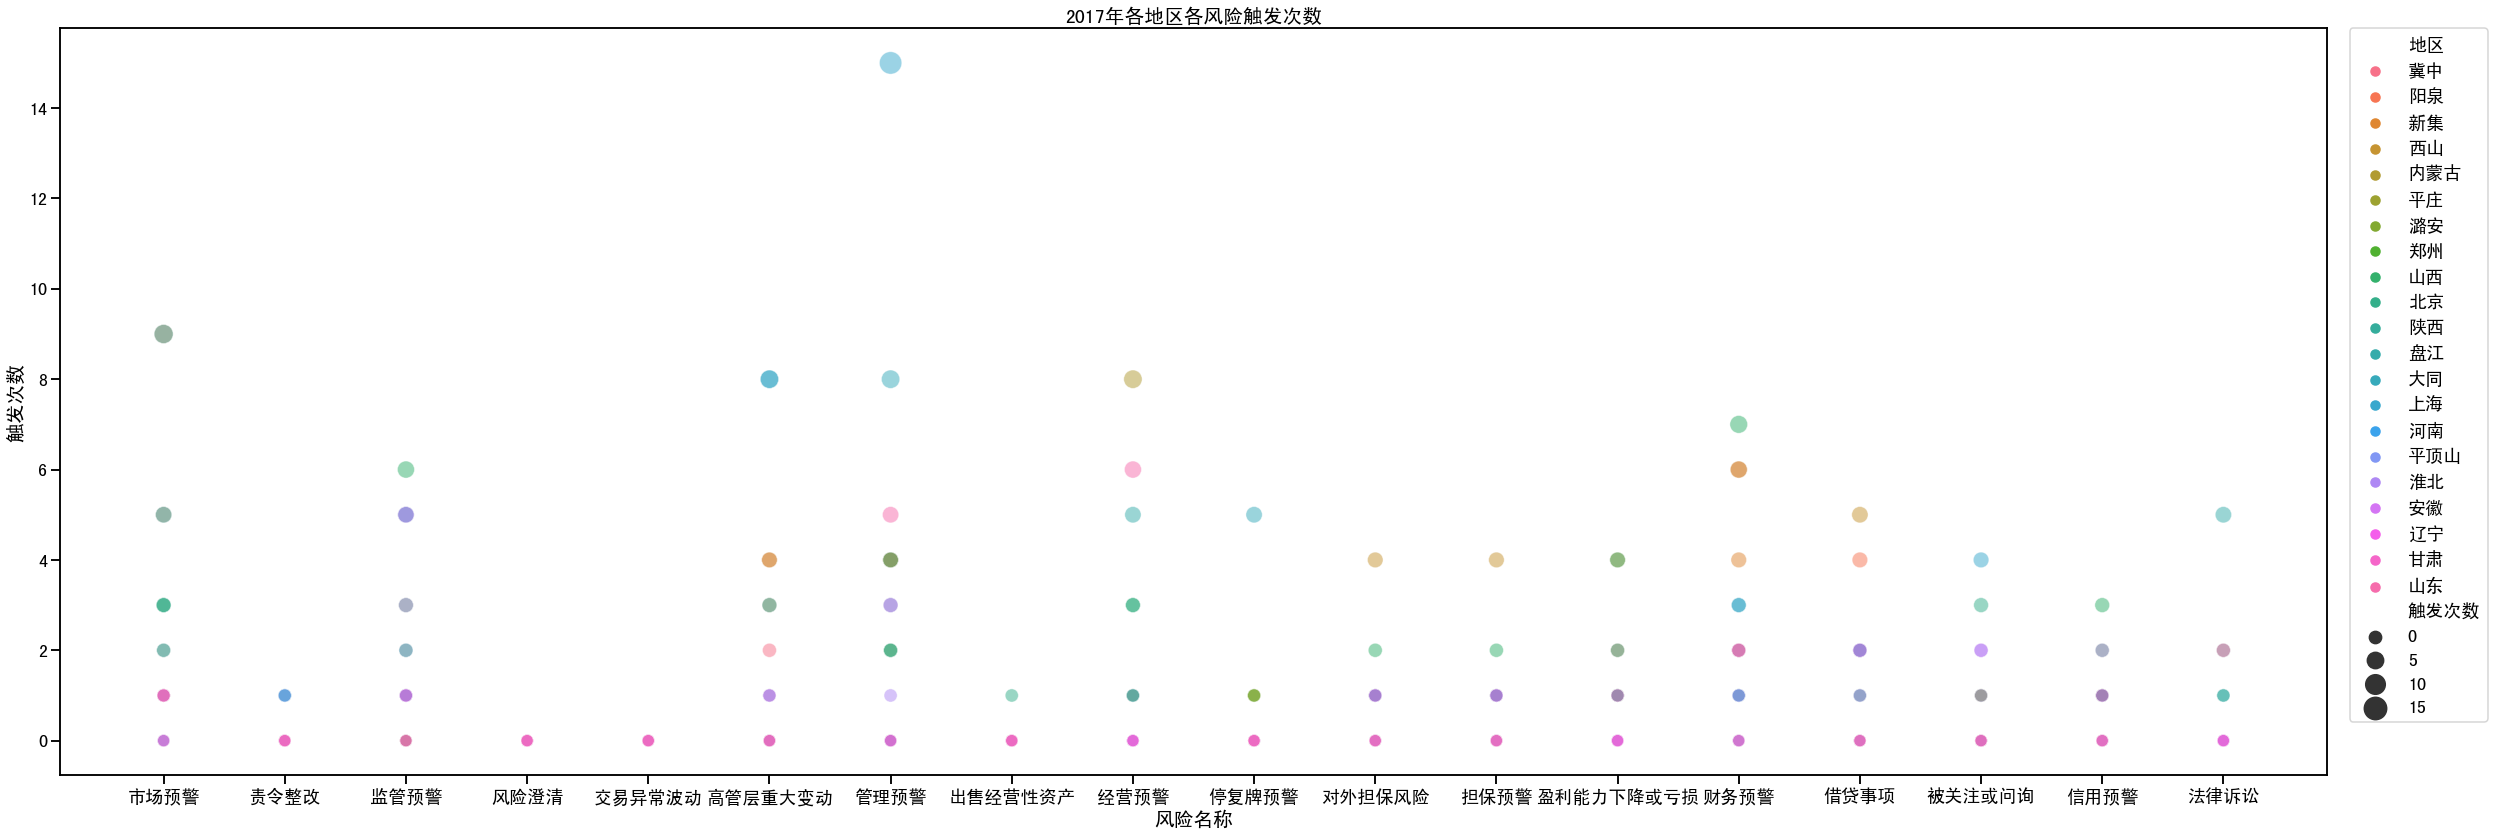

In [29]:
cityl = []
riskl = []
countl = []
newdf2 = pd.DataFrame()
for i in range(len(citylist)):
    for j in range(len(riskdic)):
        city = df[df["snap_shot"].str.contains(citylist[i], na=False)]
        city_risk = city.loc[(city['risk_name'] == riskdic[j])]
        count = city_risk.loc[city_risk['年份'] == '2017','次数'].count()
        cityl.append(citylist[i])
        riskl.append(riskdic[j])
        countl.append(count)
newdf2['风险名称'] = riskl 
newdf2['地区'] = cityl
newdf2['触发次数'] = countl
sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(35,12))
sns.scatterplot(x="风险名称", 
                y="触发次数",
                size="触发次数",
                sizes=(150,500),
                alpha=0.5,
                hue="地区",
                data=newdf2)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
# Put the legend out of the figure
#plt.legend(bbox_to_anchor=(1.01, 0.54),  borderaxespad=0.)
plt.xlabel("风险名称")
plt.ylabel("触发次数")
plt.title("2017年各地区各风险触发次数")
plt.tight_layout()

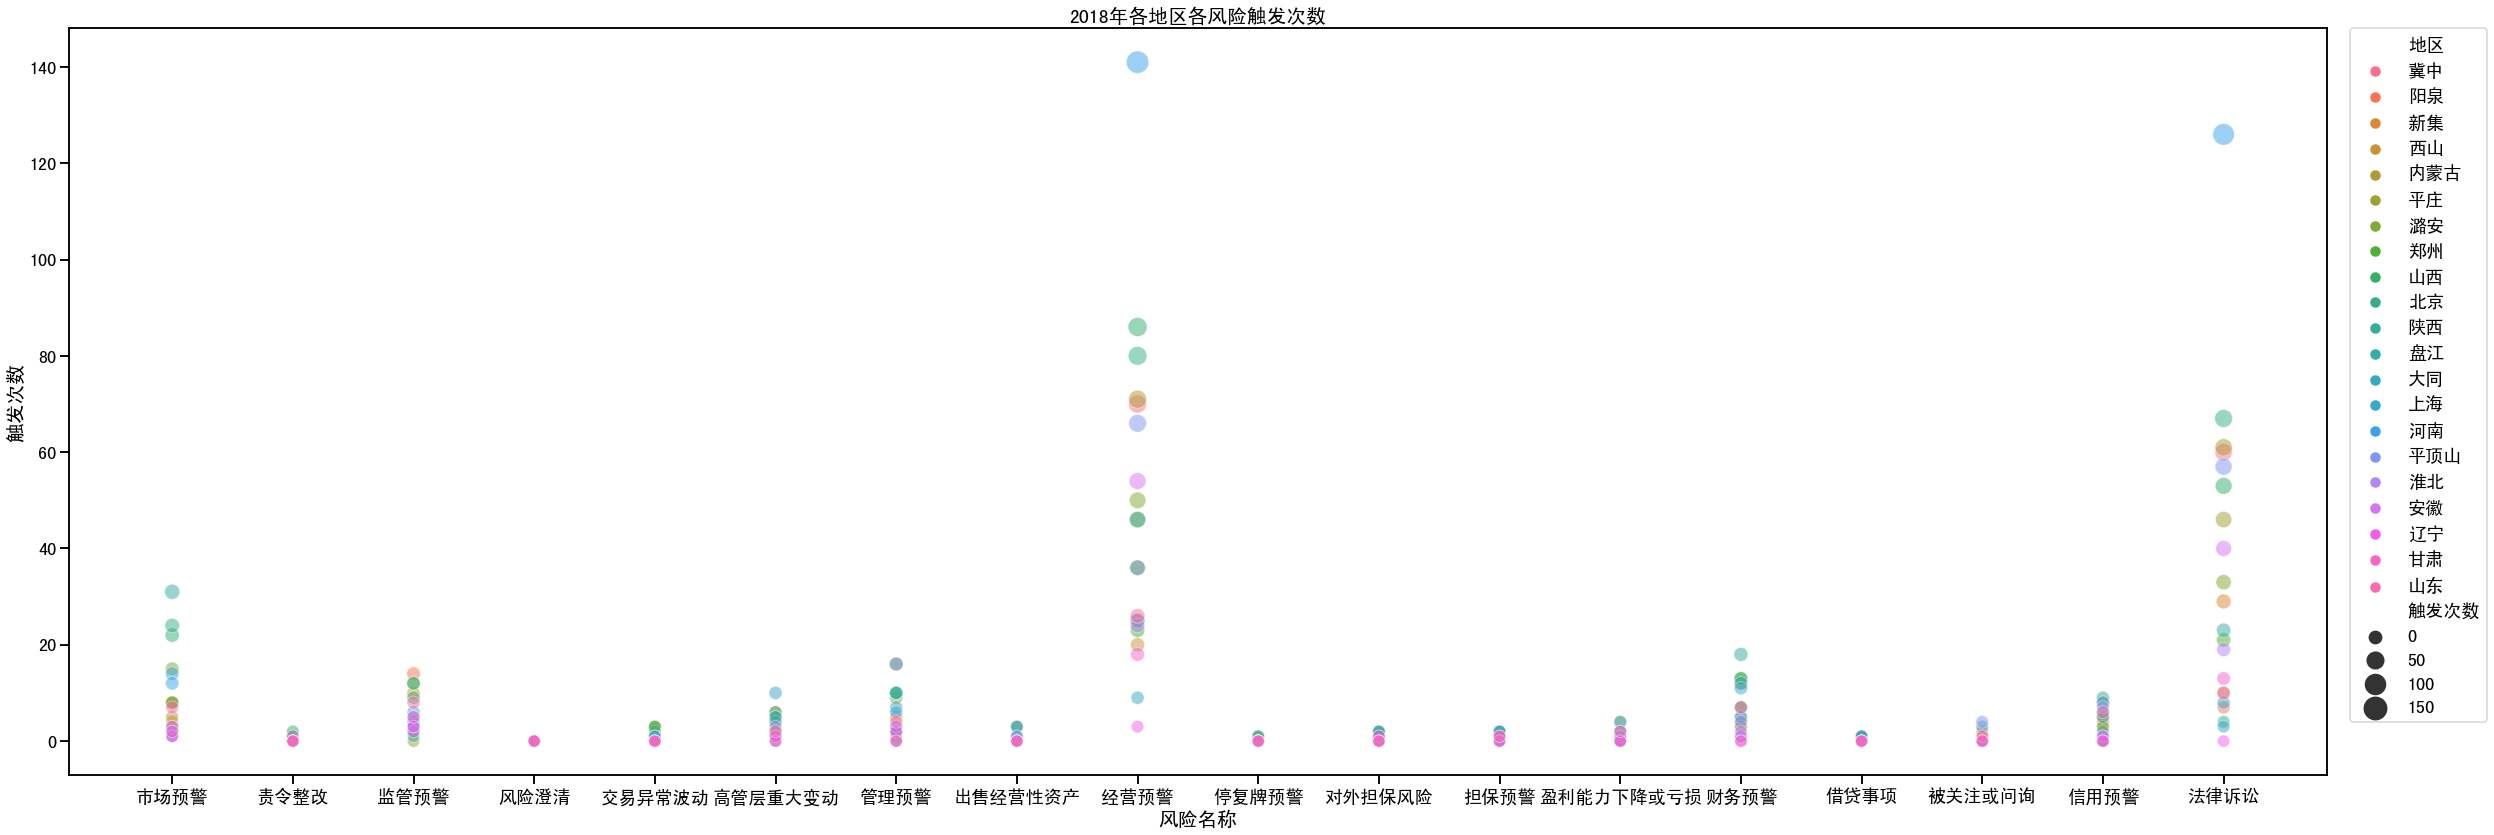

In [30]:
cityl = []
riskl = []
countl = []
newdf2 = pd.DataFrame()
for i in range(len(citylist)):
    for j in range(len(riskdic)):
        city = df[df["snap_shot"].str.contains(citylist[i], na=False)]
        city_risk = city.loc[(city['risk_name'] == riskdic[j])]
        count = city_risk.loc[city_risk['年份'] == '2018','次数'].count()
        cityl.append(citylist[i])
        riskl.append(riskdic[j])
        countl.append(count)
newdf2['风险名称'] = riskl 
newdf2['地区'] = cityl
newdf2['触发次数'] = countl
sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(35,12))
sns.scatterplot(x="风险名称", 
                y="触发次数",
                size="触发次数",
                sizes=(150,500),
                alpha=0.5,
                hue="地区",
                data=newdf2)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
# Put the legend out of the figure
#plt.legend(bbox_to_anchor=(1.01, 0.54),  borderaxespad=0.)
plt.xlabel("风险名称")
plt.ylabel("触发次数")
plt.title("2018年各地区各风险触发次数")
plt.tight_layout()

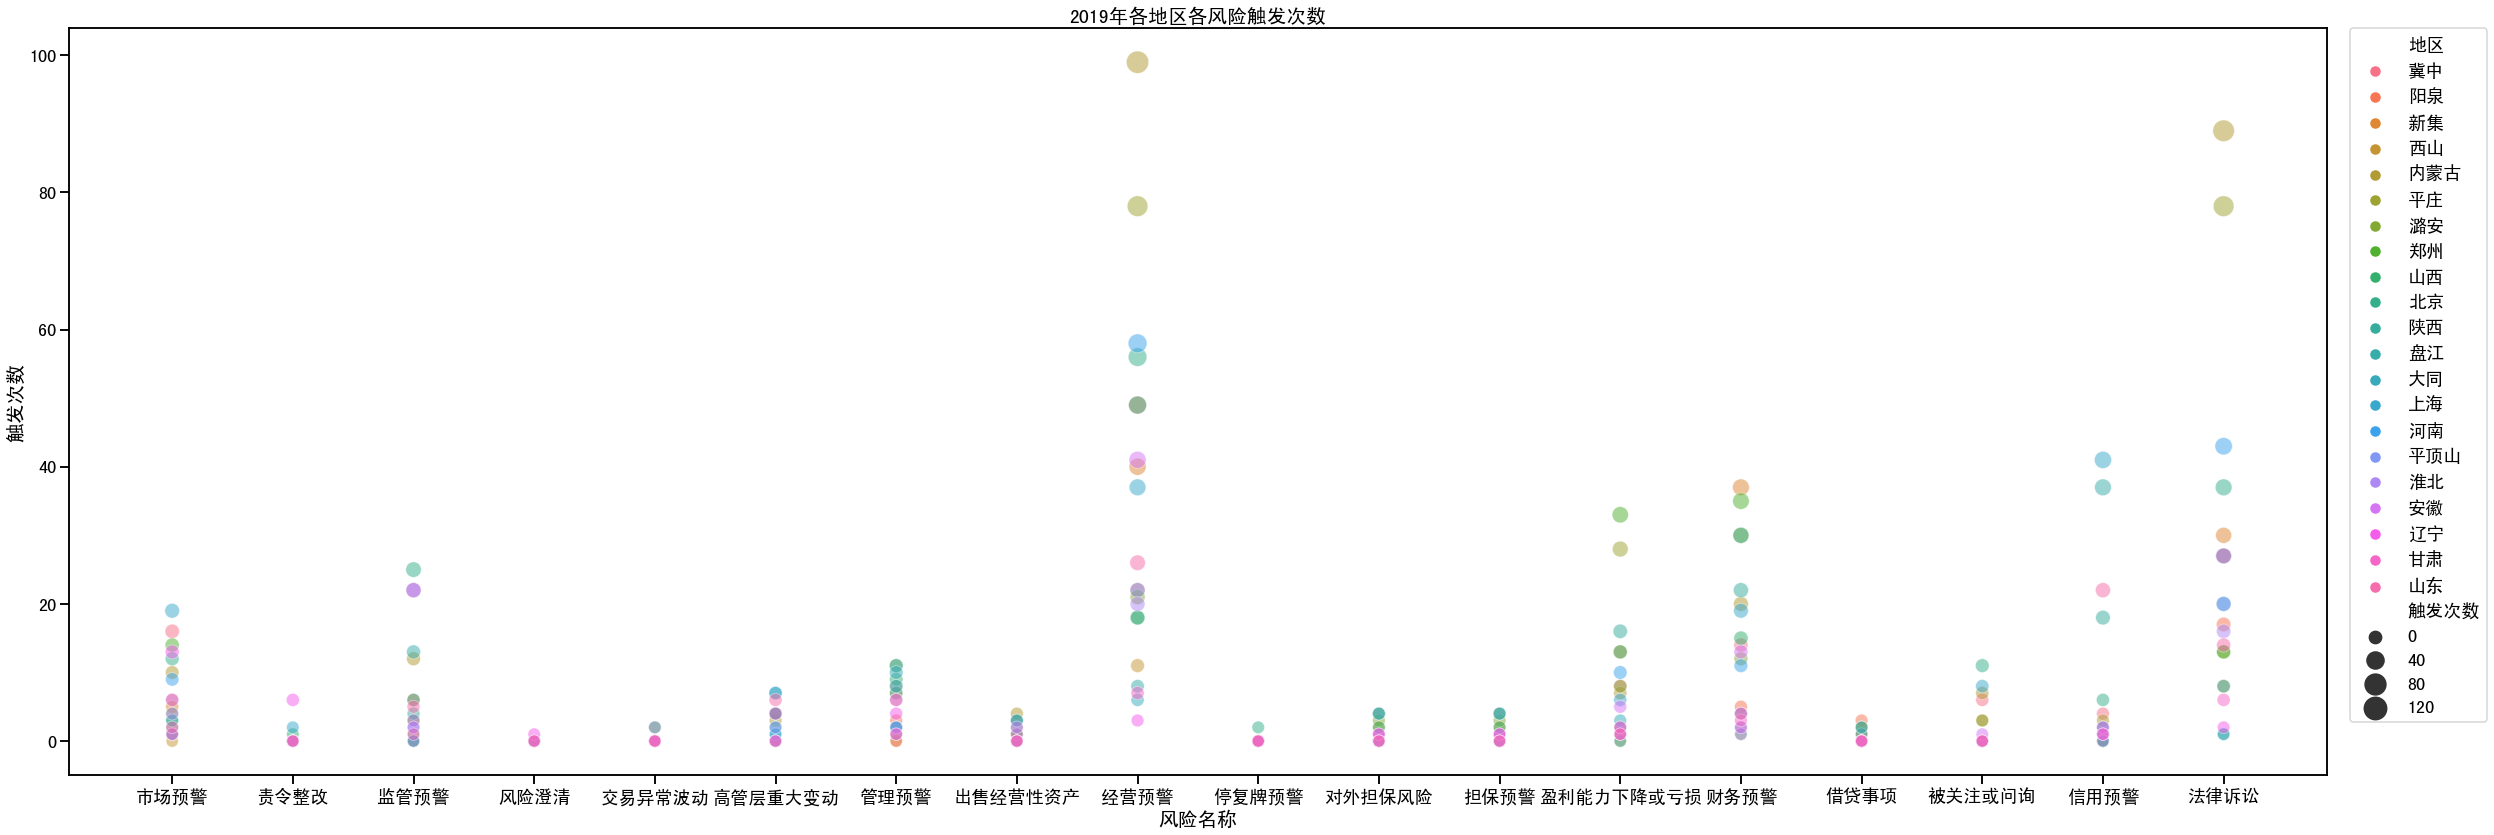

In [31]:
cityl = []
riskl = []
countl = []
newdf2 = pd.DataFrame()
for i in range(len(citylist)):
    for j in range(len(riskdic)):
        city = df[df["snap_shot"].str.contains(citylist[i], na=False)]
        city_risk = city.loc[(city['risk_name'] == riskdic[j])]
        count = city_risk.loc[city_risk['年份'] == '2019','次数'].count()
        cityl.append(citylist[i])
        riskl.append(riskdic[j])
        countl.append(count)
newdf2['风险名称'] = riskl 
newdf2['地区'] = cityl
newdf2['触发次数'] = countl
sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(35,12))
sns.scatterplot(x="风险名称", 
                y="触发次数",
                size="触发次数",
                sizes=(150,500),
                alpha=0.5,
                hue="地区",
                data=newdf2)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
# Put the legend out of the figure
#plt.legend(bbox_to_anchor=(1.01, 0.54),  borderaxespad=0.)
plt.xlabel("风险名称")
plt.ylabel("触发次数")
plt.title("2019年各地区各风险触发次数")
plt.tight_layout()

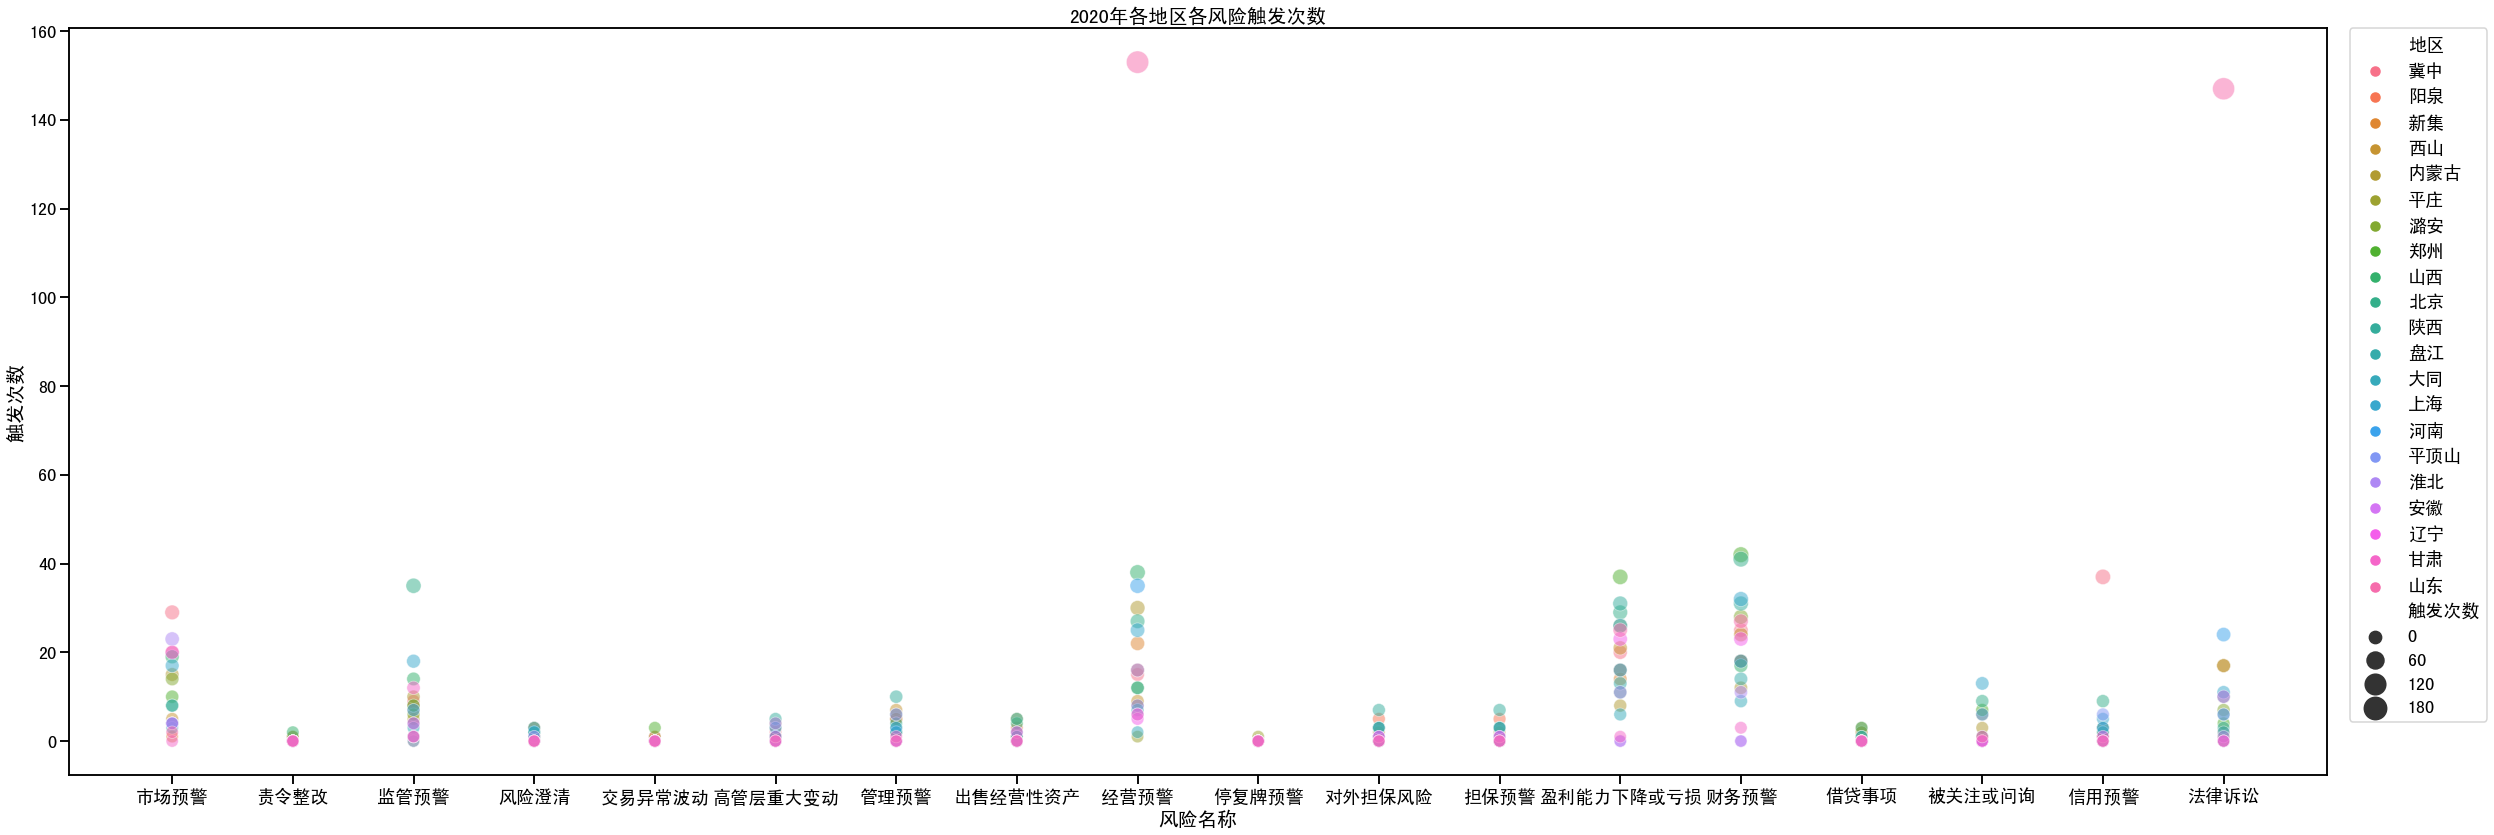

In [32]:
cityl = []
riskl = []
countl = []
newdf2 = pd.DataFrame()
for i in range(len(citylist)):
    for j in range(len(riskdic)):
        city = df[df["snap_shot"].str.contains(citylist[i], na=False)]
        city_risk = city.loc[(city['risk_name'] == riskdic[j])]
        count = city_risk.loc[city_risk['年份'] == '2020','次数'].count()
        cityl.append(citylist[i])
        riskl.append(riskdic[j])
        countl.append(count)
newdf2['风险名称'] = riskl 
newdf2['地区'] = cityl
newdf2['触发次数'] = countl
sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(35,12))
sns.scatterplot(x="风险名称", 
                y="触发次数",
                size="触发次数",
                sizes=(150,500),
                alpha=0.5,
                hue="地区",
                data=newdf2)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
# Put the legend out of the figure
#plt.legend(bbox_to_anchor=(1.01, 0.54),  borderaxespad=0.)
plt.xlabel("风险名称")
plt.ylabel("触发次数")
plt.title("2020年各地区各风险触发次数")
plt.tight_layout()

In [161]:
from matplotlib.font_manager import _rebuild

_rebuild() #reload一下

In [ ]:
loc = new['地区'].to_list()
output = 'JSON'
loc_coor = []
for m in loc:
    url = 'https://restapi.amap.com/v3/geocode/geo?'
    key = '9581203f89c707ea3c6c1dbbb6c70294' 
    link = '{}key={}&address={}&output={}'.format(url ,key ,m ,output )
    rr = requests.get(link)
    results = rr.json()
    loc_co = results['geocodes'][0]['location']
    loc_coor.append(loc_co)
loc_coor

In [30]:
#newdf = pd.DataFrame(index=loc, columns=risk)
cityl = []
risk = ['市场预警','责令整改','监管预警','风险澄清','交易异常波动','高管层重大变动',
           '管理预警','出售经营性资产','经营预警','停复牌预警','对外担保风险','担保预警',
           '盈利能力下降或亏损','财务预警','借贷事项','被关注或问询','信用预警','法律诉讼']
citylist = citydic['词名'].values
#loc = df['object_area'].drop_duplicates().values
riskl = []
countl = []
newdf2 = pd.DataFrame()
for i in range(len(citylist)):
    for j in range(len(risk)):
        city = df[df["snap_shot"].str.contains(citylist[i], na=False)]
        city_risk = city.loc[(city['risk_name'] == riskdic[j])]
        count = city_risk.loc[city_risk['年份'] == '2018','次数'].count()
        
        cityl.append(citylist[i])
        riskl.append(risk[j])
        countl.append(count)
newdf2['风险名称'] = riskl 
newdf2['地区'] = cityl
newdf2['触发次数'] = countl
newdf2.to_excel('2018.xlsx')

In [31]:
newdf2 = pd.read_excel('2020.xlsx')
loc = newdf2['地区'].to_list()
output = 'JSON'
loc_coor = []
for m in loc:
    url = 'https://restapi.amap.com/v3/geocode/geo?'
    key = '9581203f89c707ea3c6c1dbbb6c70294' 
    link = '{}key={}&address={}&output={}'.format(url ,key ,m ,output )
    rr = requests.get(link)
    results = rr.json()
    loc_co = results['geocodes'][0]['location']
    loc_coor.append(loc_co)
newdf2['经纬度'] = loc_coor

ConnectionError: HTTPSConnectionPool(host='restapi.amap.com', port=443): Max retries exceeded with url: /v3/geocode/geo?key=9581203f89c707ea3c6c1dbbb6c70294&address=%E6%B7%AE%E5%8C%97&output=JSON (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x1a271e5e10>: Failed to establish a new connection: [Errno 60] Operation timed out'))

In [26]:
import requests
import json
newdf2 = newdf2.dropna()